In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import copy


class SpaceshipTitanic:
    
    def __init__(self):
        self.train_dataset = pd.read_csv('train.csv')
        self.test_dataset = pd.read_csv('test.csv')
        self.categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Num', 'Side']
        self.numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
        self.y_column = ['Transported']
        self.deck_columns = ['Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T']
        self.category_imputer = SimpleImputer(strategy='most_frequent')
        self.numeric_imputer = SimpleImputer(strategy='mean')
        self.cleaned_set = pd.DataFrame()
        self.ready_set = pd.DataFrame()
        
    def clean_dataset(self, dataset):
        dataset.drop(['PassengerId', 'Name'], axis=1, inplace=True)
        dataset[['Deck', 'Num', 'Side']] = dataset['Cabin'].str.split('/', expand=True)
        dataset.drop('Cabin', axis=1, inplace=True)
        dataset[self.categorical_columns] = self.category_imputer.fit_transform(dataset[self.categorical_columns])
        dataset[self.numerical_columns] = self.numeric_imputer.fit_transform(dataset[self.numerical_columns])
        
        dataset.loc[
            dataset[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1) == 0, 
                     'CryoSleep'] = True
        
        dataset.loc[
            dataset['CryoSleep'] == True, 
            ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = 0
        
        dataset['Expense'] = dataset[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
        dataset.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1, inplace=True)
        self.cleaned_set = dataset
        
        return dataset
    
    def process_dataset(self, dataset):
        cols = ['HomePlanet', 'Destination', 'Num', 'CryoSleep', 'VIP', 'Side', 'Transported']
        dataset = pd.get_dummies(dataset, columns=['Deck'])
        dataset[self.deck_columns] = dataset[self.deck_columns].astype(int)
        dataset[cols] = dataset[cols].apply(LabelEncoder().fit_transform)
        dataset.rename(columns={'Side': 'Starboard'}, inplace=True)
        
        return dataset
    
    def prepare_dataset(self, dataset):
        self.ready_set = self.process_dataset(self.clean_dataset(dataset))
        
        return copy.deepcopy(self.ready_set)
        
        

In [2]:
classifier = SpaceshipTitanic()

In [4]:
classifier.train_dataset.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [5]:
classifier.train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
classifier.train_dataset.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [47]:
classifier.clean_dataset(classifier.train_dataset)

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Num,Side,Expense
0,Europa,True,TRAPPIST-1e,39.0,False,False,B,0,P,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,True,F,0,S,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,False,A,0,S,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,False,A,0,S,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,True,F,1,S,1091.0
...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,False,A,98,P,8536.0
8689,Earth,True,PSO J318.5-22,18.0,False,False,G,1499,S,0.0
8690,Earth,False,TRAPPIST-1e,26.0,False,True,G,1500,S,1873.0
8691,Europa,False,55 Cancri e,32.0,False,False,E,608,S,4637.0


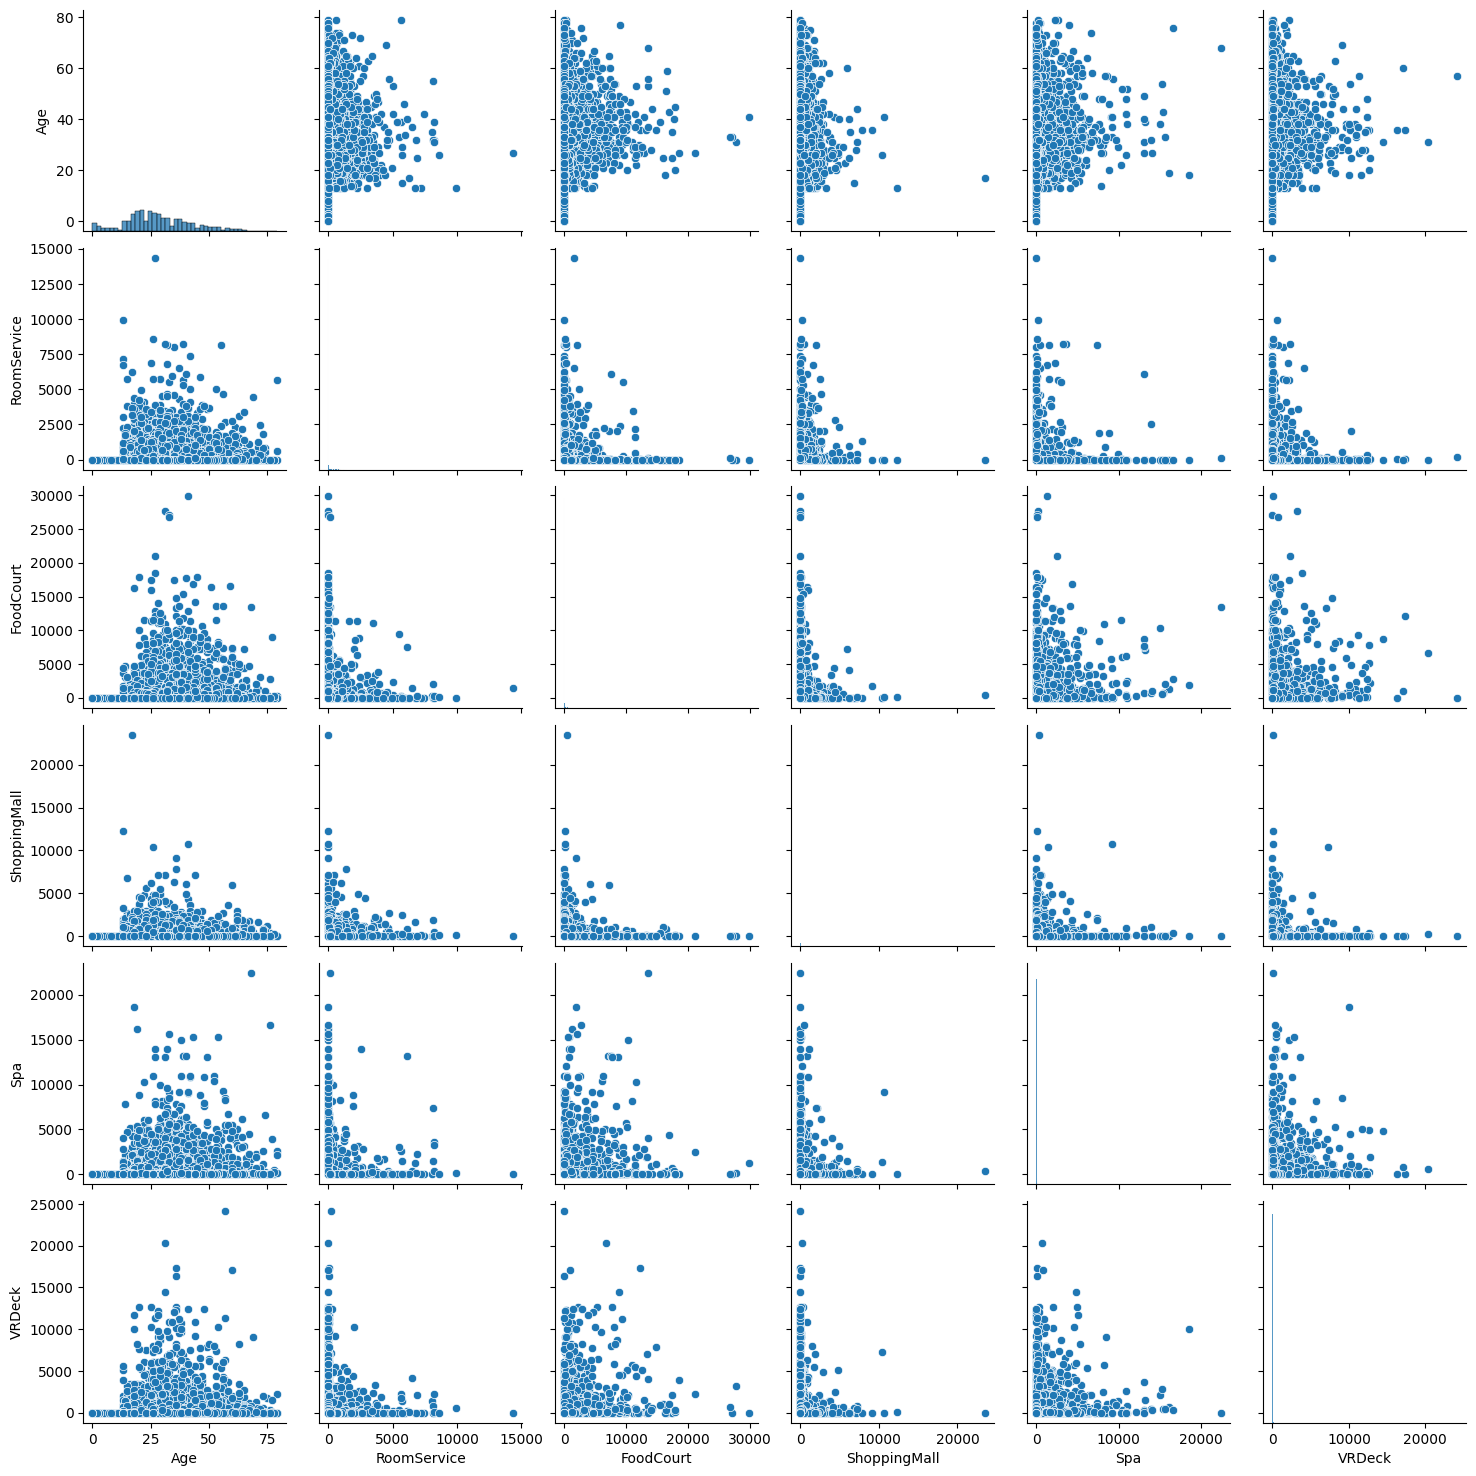

In [16]:
import seaborn as sns

numeric_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

sns.pairplot(sgd.train_dataset[numeric_columns])
plt.show()

In [50]:
classifier.cleaned_set.loc[classifier.train_dataset['Expense'] == 0]


,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Num,Starboard,Expense,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,1,1,2,39.0,0,0,0,0,0.0,False,True,False,False,False,False,False,False
7,0,1,2,28.0,0,1,0,1,0.0,False,False,False,False,False,False,True,False
9,1,1,0,14.0,0,1,1,0,0.0,False,True,False,False,False,False,False,False
10,1,1,2,34.0,0,1,1,0,0.0,False,True,False,False,False,False,False,False
18,2,1,2,45.0,0,1,1264,0,0.0,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8680,0,1,2,31.0,0,1,556,0,0.0,False,False,False,False,False,False,True,False
8681,0,1,0,33.0,0,1,546,1,0.0,False,False,False,False,False,False,True,False
8684,0,1,2,23.0,0,1,559,0,0.0,False,False,False,False,False,False,True,False
8685,1,1,2,0.0,0,1,1784,0,0.0,True,False,False,False,False,False,False,False


In [48]:
from sklearn.preprocessing import LabelEncoder
cols = ['HomePlanet', 'Destination', 'Num', 'CryoSleep', 'VIP', 'Side', 'Transported']

classifier.cleaned_set = pd.get_dummies(classifier.cleaned_set, columns=['Deck'])
classifier.cleaned_set[cols] = classifier.cleaned_set[cols].apply(LabelEncoder().fit_transform)
classifier.cleaned_set.rename(columns={'Side': 'Starboard'}, inplace=True) 

In [11]:
ready_set = copy.deepcopy(classifier.train_dataset)

In [12]:
ready_set = classifier.prepare_dataset(ready_set)
ready_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   8693 non-null   int64  
 1   CryoSleep    8693 non-null   int64  
 2   Destination  8693 non-null   int64  
 3   Age          8693 non-null   float64
 4   VIP          8693 non-null   int64  
 5   Transported  8693 non-null   int64  
 6   Num          8693 non-null   int64  
 7   Starboard    8693 non-null   int64  
 8   Expense      8693 non-null   float64
 9   Deck_A       8693 non-null   int64  
 10  Deck_B       8693 non-null   int64  
 11  Deck_C       8693 non-null   int64  
 12  Deck_D       8693 non-null   int64  
 13  Deck_E       8693 non-null   int64  
 14  Deck_F       8693 non-null   int64  
 15  Deck_G       8693 non-null   int64  
 16  Deck_T       8693 non-null   int64  
dtypes: float64(2), int64(15)
memory usage: 1.1 MB


In [5]:
ready_set.drop(['Age', 'Expense'], axis=1, inplace=True)

In [6]:
corr_matrix = ready_set.corr()
corr_matrix['Transported'].sort_values(ascending=False)

Transported    1.000000
CryoSleep      0.478410
Deck_B         0.144733
HomePlanet     0.115461
Deck_C         0.108193
Starboard      0.101397
Num            0.019284
Deck_G         0.016269
Deck_A        -0.002623
Deck_T        -0.014568
Deck_D        -0.034046
VIP           -0.037261
Deck_F        -0.086360
Deck_E        -0.097965
Destination   -0.108152
Name: Transported, dtype: float64

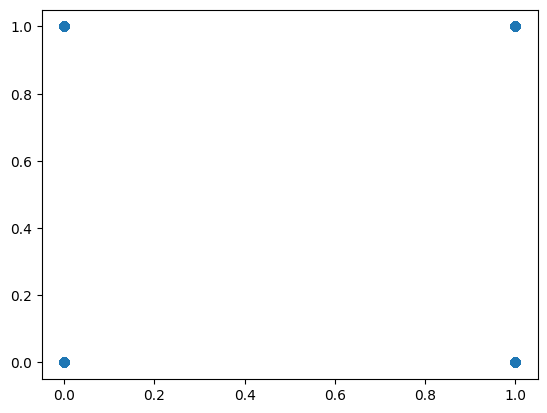

In [7]:
plt.scatter(ready_set['CryoSleep'],ready_set['Transported'])
plt.show()

In [14]:
dummies = pd.get_dummies(ready_set, columns=['Starboard', 'Transported'])
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HomePlanet     8693 non-null   int64  
 1   CryoSleep      8693 non-null   int64  
 2   Destination    8693 non-null   int64  
 3   Age            8693 non-null   float64
 4   VIP            8693 non-null   int64  
 5   Num            8693 non-null   int64  
 6   Expense        8693 non-null   float64
 7   Deck_A         8693 non-null   int64  
 8   Deck_B         8693 non-null   int64  
 9   Deck_C         8693 non-null   int64  
 10  Deck_D         8693 non-null   int64  
 11  Deck_E         8693 non-null   int64  
 12  Deck_F         8693 non-null   int64  
 13  Deck_G         8693 non-null   int64  
 14  Deck_T         8693 non-null   int64  
 15  Starboard_0    8693 non-null   bool   
 16  Starboard_1    8693 non-null   bool   
 17  Transported_0  8693 non-null   bool   
 18  Transpor

In [23]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
# labels = ready_set['Transported']
ready_set_0 = np.array(ready_set['CryoSleep', 'Destination'])
# ready_set.drop(columns=['Transported'], axis=1, inplace=True)
sgd_clf.fit(ready_set_0, labels)

KeyError: ('CryoSleep', 'Destination')

In [9]:
labels.astype(int)
labels.describe()

count    8693.000000
mean        0.503624
std         0.500016
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Transported, dtype: float64

In [16]:
#Cross validation
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, ready_set, labels, cv=5, scoring='accuracy')

array([0.50316274, 0.293272  , 0.68545141, 0.50287687, 0.50345224])

In [17]:
#stratified k-fold
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42,shuffle=True)

for train_index, test_index in skfolds.split(ready_set, labels):
    clone_clf = clone(sgd_clf)
    train_folds = ready_set.iloc[train_index]
    train_label_folds = (labels.iloc[train_index])
    test_fold = ready_set.iloc[test_index]
    test_label_fold = (labels.iloc[test_index])
    
    clone_clf.fit(train_folds, train_label_folds)
    pred = clone_clf.predict(test_fold)
    n_correct = sum(pred == test_label_fold)
    print(n_correct / len(pred))
    

0.5017253278122843
0.5034506556245687
0.5833620987228167


In [18]:
#Confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions = cross_val_predict(sgd_clf, ready_set, labels, cv=3)
confusion_matrix(labels, predictions)

array([[2022, 2293],
       [1732, 2646]])

In [19]:
from sklearn.metrics import precision_score, recall_score

precision_score(labels, predictions)

0.5357359789431059

In [20]:
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier


def plot_learning_curves(dataset, labels):
    train_set, val_set, train_labels, val_labels = train_test_split(dataset, labels, test_size=0.2, stratify=labels)
    train_errors, val_errors = [], []
    sgd_clf = SGDClassifier(random_state=42)
      
    for m in range(1, len(train_set)):
        sgd_clf.fit(train_set[:m], train_labels[:m])
        train_predict = sgd_clf.predict_proba(train_set[:m])
        val_predict = sgd_clf.predict_proba(val_set)
        train_errors.append(log_loss(train_predict, train_labels[:m]))
        val_errors.append(log_loss(val_predict, val_labels))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "g", linewidth=3, label="val")

In [15]:
plot_learning_curves(ready_set, labels)

ValueError: The number of classes has to be greater than one; got 1 class

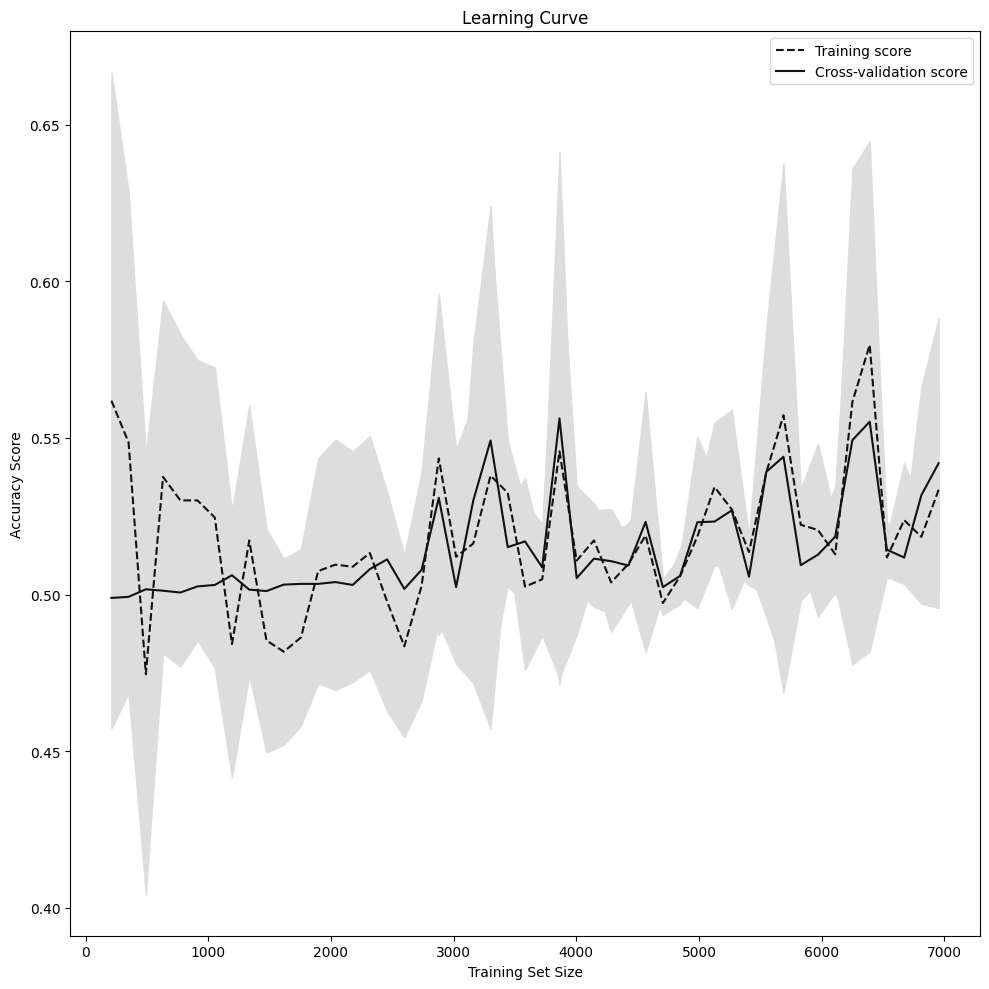

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import learning_curve

X, y = ready_set, labels
train_sizes, train_scores, test_scores = learning_curve(SGDClassifier(), X, y, 
 cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()